# Calculate Jcoupling
https://github.com/srnas/barnaba/blob/master/examples/example_05_scalar_couplings.ipynb

In [1]:
import os, sys, math
import numpy as np
import glob
import mdtraj
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import warnings

#from openmmtools.multistate import ReplicaExchangeSampler, MultiStateReporter
import openmmtools as mmtools
from pymbar import timeseries
from openmm import *
from openmm.app import *
#from openmm.unit import *

import barnaba as bb
from barnaba import definitions
from barnaba.nucleic import Nucleic

#### define input file

In [2]:
pdb_init = "../../eq/solvated.pdb"
pdb_min = "../../eq/min.pdb"
traj = "../../eq/traj.nc"

In [3]:
_ = mdtraj.load_pdb(pdb_init)
rnames = [ residue.name for residue in _.topology.residues if residue.name not in ["HOH", "NA", "CL"]]
print(rnames)

['C', 'C', 'C', 'C']


#### calculate jcoupling

We here calculate 3J scalar couplings for an entire trajectory The following couplings can be calculated:

**In the sugar:**
- H1H2. function of torsion angle H1'-C1'-C2'-H2' -> nu1  
- H2H3. function of torsion angle H2'-C2'-C3'-H3' -> nu2  
- H3H4. function of torsion angle H3'-C3'-C4'-H4' -> nu3  

**In the backbone:**
- 1H5P, 2H5P, C4Pb. Function of beta torsion angle -> beta  
- 1H5H4,2H5H4. Function of gamma torsion angle -> gamma  
- H3P,C4Pe. Function of epsilon torsion angle -> epsilon  

**In the nucleobase:**
- H1C2/4, H1C6/8. Function of chi torsion angle  -> chi  
by default, all scalar couplings for all residues are calculated.

This means that the output of the jcoupling function is a `n x m x 12` array, where
n = # of frames
m = # of nucleobases
12 = total number of couplings

rr is the list of residue names

**ATT!** it is important that the atom names follow the amber naming conventions. This is tricky for hydrogens. Other names may not be recognized!

In [28]:
mydict={}
mydict["H1H2"] = "nu1"
mydict["H2H3"] = "nu2"
mydict["H3H4"] = "nu3"
mydict["1H5P"] = "beta1"
mydict["2H5P"] = "beta2"
mydict["1H5H4"] = "gamma1"
mydict["2H5H4"] = "gamma2"
mydict["H3P"] = "epsilon"

couplings, rr = bb.jcouplings(traj,topology=pdb_init, couplings=["H1H2", "H2H3", "H3H4", "1H5P", "2H5P", "1H5H4", "2H5H4", "H3P"] )
#couplings, rr = bb.jcouplings(traj,topology=pdb_init)
print(couplings.shape)

(110, 4, 8)


# Loading ../../eq/traj.nc 


We now print only the couplings relative to the first residue of the first frame

In [30]:
from barnaba import definitions
for e in range(1):
    stri = ""
    for k in range(1):
        for l in range(couplings.shape[2]):
            #stri += "%10s " %  list(definitions.couplings_idx.keys())[l]
            stri += "%10s " % list(mydict.values())[l]
            stri += " %10.4f Hz\n " % couplings[e,k,l]
        stri += "\n"
stri += "\n"
print(stri)    

       nu1      1.8225 Hz
        nu2      6.5275 Hz
        nu3      8.1016 Hz
      beta1         nan Hz
      beta2         nan Hz
     gamma1      0.8173 Hz
     gamma2      2.3718 Hz
    epsilon     10.3689 Hz
 




calculate average and standard deviation

But we can also plot the histogram of the H1H2 couplings for all frames

Text(0.5, 0, 'H1H2 coupling, residue C_1_0 (Hz)')

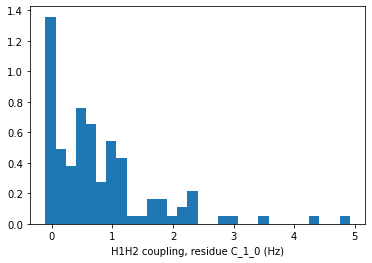

In [7]:
plt.hist(couplings[:,0,0],bins=30,density=True)
plt.xlabel("H1H2 coupling, residue %s (Hz)" % rr[0])

If the keyword raw=True, the output is the value of the torsion angle, and not the coupling. For example

`angles,rr = bb.jcouplings(traj,topology=top,raw=True,residues=["RC5_1_0"])`

returns the angles in radians for all frames of the residue RC3_1_0. As usual, the naming convention is RESNAME_RESNUMBER_CHAININDEX. Note that the shape of the array angles is n x m x 6, where
n = # number of frames
m = # number of residues in the list (in this specific example m=1)
6 = number of torsion angles that are needed for the couplings calculations (H1'-H2',H2'-H3',H3'-H4',beta,gamma,epsilon,chi )

(110, 1, 7)


# Loading ../../eq/traj.nc 


Text(0.5, 0, "H1'-C1'-C2'-H2' angle, residue C_1_0 (rad)")

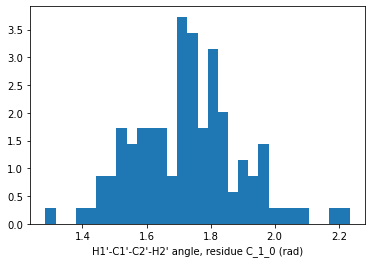

In [10]:
angles, rr = bb.jcouplings(traj, topology=pdb_init, residues=["C_1_0"], raw=True)
print(angles.shape)

plt.hist(angles[:,0,0], bins=30, density=True)
plt.xlabel("H1'-C1'-C2'-H2' angle, residue %s (rad)" % rr[0])